# Mortality due to Interpersonal Violence in Different Countries and United States

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have selected the following data from Gapminder World. 

* Murdered children 0-14 (per 100,000 people) 
* Murdered 15-29 (per 100,000 people)	  
* Murdered 30-44, (per 100,000 people)  
* Murdered 45-59 (per 100,000 people)
* Murdered 60+ (per 100,000 people)  
* Murdered women (per 100,000 people)
* Murdered men (per 100,000 people)	  
* Murder (total deaths)

I will be looking at the 2004 data across the world as well as United States throughout the years to see if there are any interesting facts or trends. 


<a id='wrangling'></a>
## Data Wrangling

Given that each spreadsheet has missing values for certain years and countries, I have decided to look at the most complete year of 2004 and analyze between countries. For the US, I will focus on the years from 1950 to 2005, which is the most updated year from Gapminder World. I will be combining all the spreadsheets into two dataframes, one for the 2004 worldwide, and the other for the US. 

In [1]:
import pandas as pd
from functools import reduce
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

**Create a dataframe df_04 for 2004 Worldwide.**
Each column represents number of deaths in 100,000 standard population except for total column, which is number of total deaths in this year. 

In [2]:
files = ['0-14.csv', '15-29.csv', '30-44.csv', '45-59.csv', '60+.csv', 'murdered_female.csv', 'murdered_male.csv', 'total_homicides.csv']
column_names = ['Homicide 0-14 all age adj', 'Homicide 15-29 all', 'Homicide 30-44 all age adj', 'Homicide 45-59 all age adj', 'Homicide 60+ all age adj', 'Murdered women, per 100,000, age adjusted', 'Murdered men, per 100,000, age adjusted', 'Total number of deaths from interpersonal violence']
dfs = []

for i, file in enumerate(files):
    df = pd.read_csv(file) # read each csv file
    df.rename(columns={column_names[i]:'country'}, inplace=True) # rename the first column (countries) to 'country'
    df = df[['country', '2004']] # extract country and 2004 columns
    dfs.append(df) # append dataframes to dfs 
    
df_04 = reduce(lambda left,right: pd.merge(left,right,on='country'), dfs) # merge all the dataframes
df_04.columns = ['country', '0-14', '15-29', '30-44', '45-59', '60+', 'female', 'male', 'total'] # rename new dataframe
df_04 = df_04.dropna() # drop NaN rows
df_04.head()

,country,0-14,15-29,30-44,45-59,60+,female,male,total
0,Argentina,0.819823,9.547773,7.934919,5.892612,5.734886,1.621157,10.346290,2596.0
1,Australia,0.208610,0.963927,1.381454,0.934952,0.369453,0.561403,1.003637,253.0
2,Austria,0.548978,0.538148,0.602391,1.298284,0.803701,0.750632,0.666816,63.0
6,Belgium,0.655149,1.923470,2.270047,2.224916,1.260788,1.528936,1.736720,164.0
8,Brazil,1.554305,53.668580,34.174550,18.310410,10.424670,3.999783,46.722610,57250.0


**Create a dataframe df_us for US 1950 - 2005. **

In [3]:
files_1 = ['0-14.csv', '15-29.csv', '30-44.csv', '45-59.csv', '60+.csv', 'murdered_female.csv', 'murdered_male.csv']
column_names_1 = ['Homicide 0-14 all age adj', 'Homicide 15-29 all', 'Homicide 30-44 all age adj', 'Homicide 45-59 all age adj', 'Homicide 60+ all age adj', 'Murdered women, per 100,000, age adjusted', 'Murdered men, per 100,000, age adjusted']
dfs_1 = []

for i, file in enumerate(files_1):
    df = pd.read_csv(file) # read each csv file
    df = df[df[column_names_1[i]] == "United States"] # extract US data
    dfs_1.append(df) # append dataframes to dfs_1

df_us = pd.concat(dfs_1) # concatenate dataframes 
df_us = df_us.drop(df_us.columns[-11:], axis=1) # drop columns with NaN
df_us = df_us.T # switch rows and columns
df_us = df_us.reset_index() # reset index
df_us.columns = ['year', '0-14', '15-29', '30-44', '45-59', '60+', 'female', 'male'] # rename columns
df_us['total'] = df_us['0-14'] + df_us['15-29'] + df_us['30-44'] + df_us['45-59'] + df_us['60+'] # calculate total 
df_us.head()

,year,0-14,15-29,30-44,45-59,60+,female,male,total
0,1950,0.829125,7.372231,9.189565,5.662168,3.102820,2.429415,8.196151,26.155909
1,1951,0.747870,7.070450,8.387650,5.472495,2.871524,2.363364,7.639011,24.549989
2,1952,0.738042,7.609122,9.246769,5.589758,2.986176,2.374305,8.365354,26.169867
3,1953,0.706185,6.968571,8.790662,5.502373,2.804991,2.295520,7.843788,24.772782
4,1954,0.779996,7.129323,8.416882,5.781341,2.762631,2.329716,7.841660,24.870173


<a id='eda'></a>
## Exploratory Data Analysis

With the new dataframes, I would like to pose questions such as the following: 

**2004 Worldwide**
* Which country has the highest mortality per 100,000 population? 
* Which country has the highest number of deaths per year? 
* How are ages distributed? 
* How are gender distributed? 

**US 1950 - 2005**
* Which decade has the highest mortality?
* Which decade has the highest mortality for different age groups?
* What about gender?


### 2004 Worldwide


In order to compare countries with the age groups combined, I've chosen a stacked bar plot that will show the distribution of all age groups as well as the total. 

We can see from the graph below, the highest mortality, all ages combines per 100,000 population, top 5 are: 
1. Colombia 
2. Guatemala
3. Venezuela
4. Russia
5. Brazil

It seems like these may be the most dangerous place in the world in terms of murder rates because of the high density mortality, for 2004 at least. 

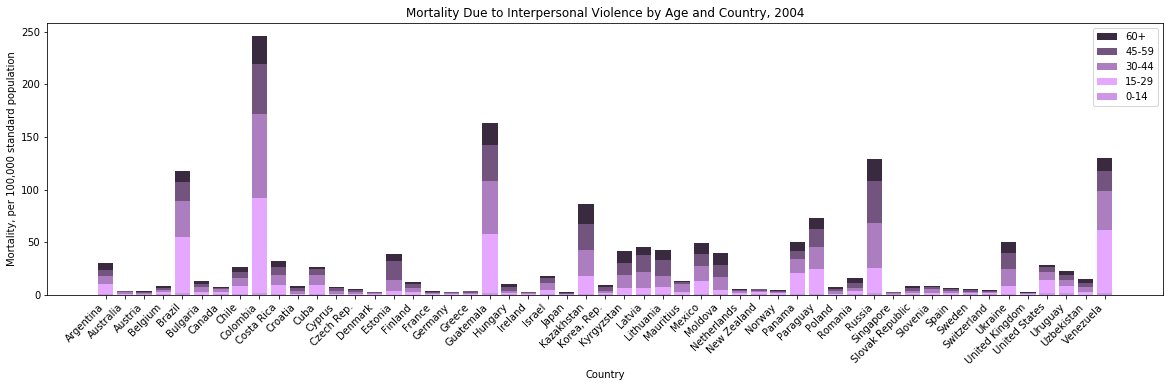

In [4]:
# stacked bar plot for age distribution 
countries = df_04['country']
age_0_14 = df_04['0-14']
age_15_29 = df_04['15-29']
age_30_44 = df_04['30-44']
age_45_59 = df_04['45-59']
age_60 = df_04['60+']
colors1 = ['#392A40', '#73547F', '#AC7DBF', '#E5A7FF', '#CE96E5']
label1 = ['60+', '45-59', '30-44', '15-29', '0-14']

# set up a helper function for plotting 
def my_plotter(group1, group2, group3, group4, group5, column, label, colors):
    ind = list(range(0, len(column))) 

    plt.figure(figsize=(20,5))

    plt.bar(ind, group5, width=0.8, label=label[0], color=colors[0], bottom=group4+group3+group2+group1)
    plt.bar(ind, group4, width=0.8, label=label[1], color=colors[1], bottom=group3+group2+group1)
    plt.bar(ind, group3, width=0.8, label=label[2], color=colors[2], bottom=group2+group1)
    plt.bar(ind, group2, width=0.8, label=label[3], color=colors[3], bottom=group1)
    plt.bar(ind, group1, width=0.8, label=label[4], color=colors[4])

    plt.xticks(ind, column)
    plt.legend(loc="upper right")

    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')  # rotate axis labels

my_plotter(age_0_14, age_15_29, age_30_44, age_45_59, age_60, countries, label1, colors1)
plt.title("Mortality Due to Interpersonal Violence by Age and Country, 2004")
plt.ylabel("Mortality, per 100,000 standard population")
plt.xlabel("Country")
plt.show()

To see how each country's age group by proportion, I've chosen the proportion bar plot where each country has a sum of 1 (100%). It's good for looking at each country individually, but not for between country comparison because one country can have very low total mortality but the proportion of certain age group may appear high. 

From the below graph, we have proportion of mortality by age:
* Singapore has the highest proportion of mortality for age group 0 - 14 (26.70%).
* Venezuela has the highest proportion of mortality for age group 15 - 29 (46.27%).
* Mauritius has the highest proportion of mortality for age group 30 - 44 (58.30%).
* Estonia has the highest proportion of mortality for age group 45 - 59 (44.74%).
* Japan has the highest proportion of mortality for age group 60+ (27.94%). 

These do not necessarily mean that Singapore is a "children killing" country or Japan is an "elderly killing" country because these numbers represent the proportions of mortality by age, and from the above graph we can tell that neither Singapore nor Japan has high mortality compared with other countries. 

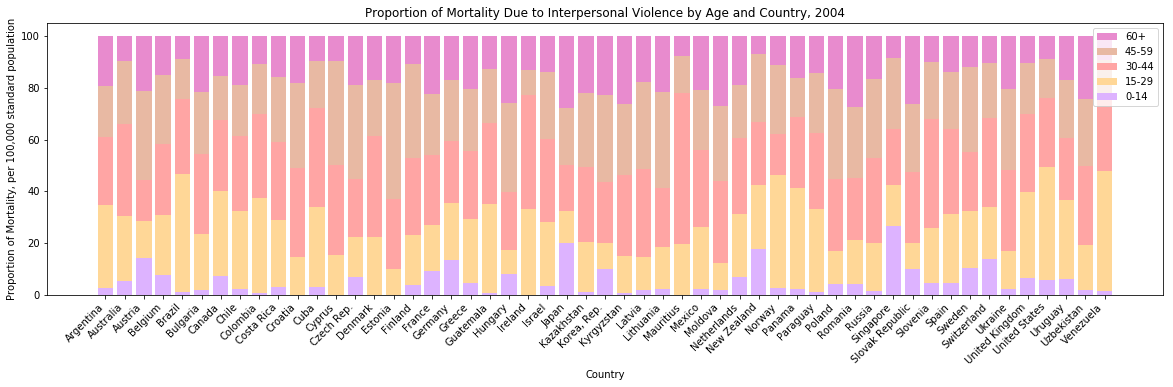

In [5]:
# calculate proportion for each age group 
total = age_0_14 + age_15_29 + age_30_44 + age_45_59 + age_60
proportion_0_14 = np.true_divide(age_0_14, total) * 100
proportion_15_29 = np.true_divide(age_15_29, total) * 100
proportion_30_44 = np.true_divide(age_30_44, total) * 100
proportion_45_59 = np.true_divide(age_45_59, total) * 100
proportion_60 = np.true_divide(age_60, total) * 100
colors2 = ['#E88BCE', '#E8B9A3', '#FFA5A4', '#FFD797', '#DDB3FF']

my_plotter(proportion_0_14, proportion_15_29, proportion_30_44, proportion_45_59, proportion_60, countries, label1, colors2)
plt.ylabel("Proportion of Mortality, per 100,000 standard population")
plt.xlabel("Country")
plt.title("Proportion of Mortality Due to Interpersonal Violence by Age and Country, 2004")
plt.ylim=1.0
plt.show()

I've chosen the same proportion bar plot to show mortality by gender. 

* Highest proportion of mortality for male: Venezuela
* Highest proportion of mortality for female: Austria
* About half and half: 
    * Austria
    * Belgium
    * Germany
    * Japan
    * South Korea
    * Switzerland
    
It's interesting to notice that there is no "gender discrimination" in terms of murder in the above listed countries (half & half), which somehow all of them are very high human development nations. 


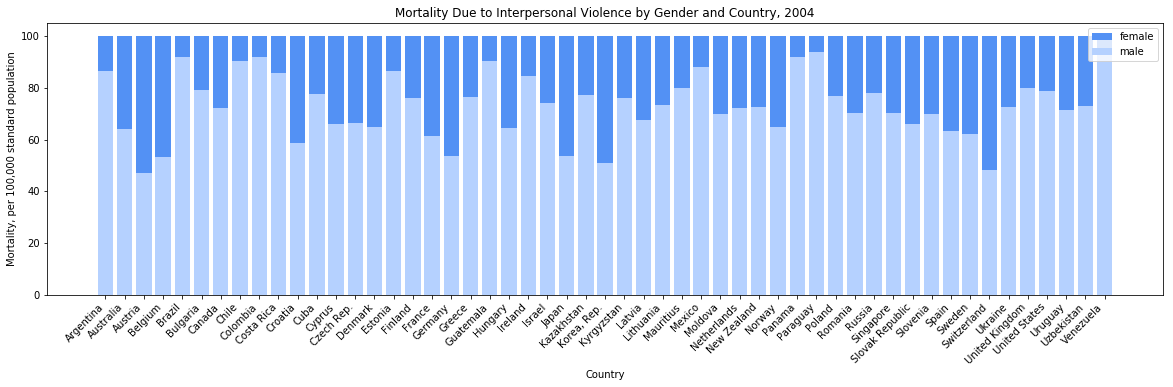

In [6]:
# proportion bar plot for gender distribution 
countries = df_04['country']
female = df_04['female']
male = df_04['male']
total = female + male
proportion_f = np.true_divide(female, total) * 100
proportion_m = np.true_divide(male, total) * 100

def my_plotter_gender(proportion_f, proportion_m, column):
    ind = list(range(0, len(column)))
    plt.figure(figsize=(20,5))

    plt.bar(ind, proportion_f, width=0.8, label='female', color='#5391f4', bottom=proportion_m)
    plt.bar(ind, proportion_m, width=0.8, label='male', color='#b5d1ff')

    plt.xticks(ind, column)
    plt.legend(loc="upper right")
    plt.ylim=1.0    
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    
my_plotter_gender(proportion_f, proportion_m, countries)
plt.ylabel("Mortality, per 100,000 standard population")
plt.xlabel("Country")
plt.title("Mortality Due to Interpersonal Violence by Gender and Country, 2004")
plt.show()

Finally, to look at the total number of deaths per year, I've decided to use a simple bar plot and we have top five:
1. Brazil
2. Russia
3. Colombia
4. United States
5. Venezuela

In terms of population in 2004, 
* Brazil 179 millions
* Russia 144 millions
* Colombia 45.3 millions
* United States 294 millions
* Venezuela 26.2 millions

With the simple math below, we can see that Colombia has the highest number of deaths per 1 million population, which aligns with the result of first graph, the highest mortality, all ages combines per 100,000 population.

Population data 2004: 
http://www.prb.org/pdf04/04WorldDataSheet_ENG.pdf

In [7]:
df_04.sort_values('total', ascending=False)
total = np.array([57250, 42918, 36619, 17647, 10295]) 
population = np.array([179, 144, 45.3, 294, 26.2])
proportion = total / population
print(proportion)

[ 319.83240223  298.04166667  808.36644592   60.02380952  392.9389313 ]


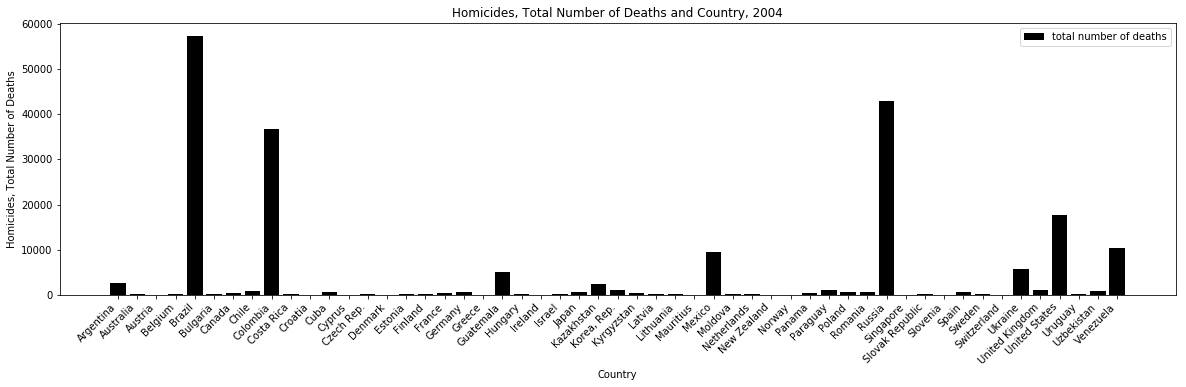

In [8]:
total_murder = df_04['total']
ind = list(range(0, len(countries)))

plt.figure(figsize=(20,5))
plt.bar(ind, total_murder, width=0.8, label='total number of deaths', color='black')

plt.xticks(ind, countries)
plt.ylabel("Homicides, Total Number of Deaths")
plt.xlabel("Country")
plt.legend(loc="upper right")
plt.title("Homicides, Total Number of Deaths and Country, 2004")
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


### US 1950 - 2005


The following two graphs represent mortality in the US categorized by different age groups.  
1970s have the highest mortality all ages combined per 100,000 population. Since 1993, it has steadily declined till 2000. All time high is 1974, and all time low is 1955. 

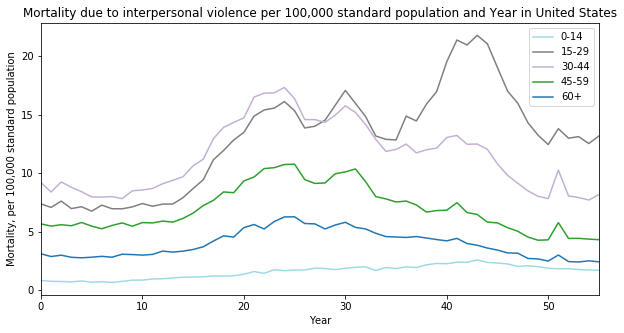

In [9]:
# line plot for mortality by age
df_age = df_us[['0-14', '15-29', '30-44', '45-59', '60+']]
df_age.plot(title='Mortality due to interpersonal violence per 100,000 standard population and Year in United States', colormap='tab20_r', figsize=(10, 5))
plt.xlabel('Year')
plt.ylabel('Mortality, per 100,000 standard population')

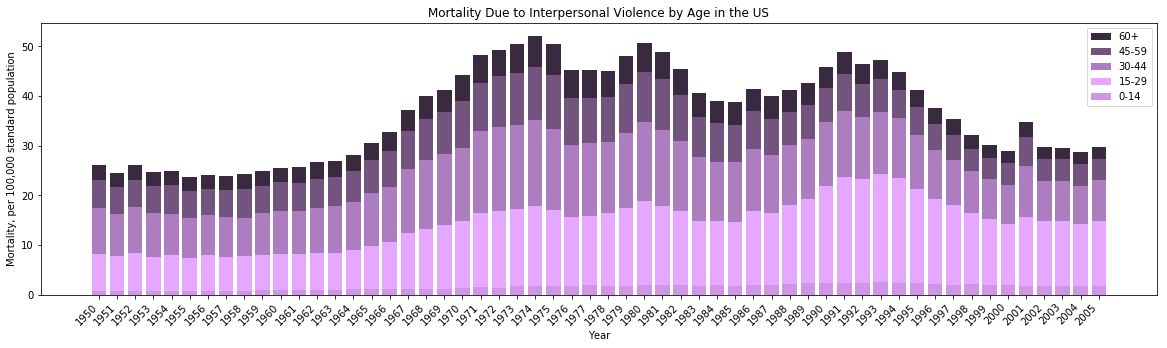

In [10]:
year = df_us['year']
age_0_14 = df_us['0-14']
age_15_29 = df_us['15-29']
age_30_44 = df_us['30-44']
age_45_59 = df_us['45-59']
age_60 = df_us['60+']

my_plotter(age_0_14, age_15_29, age_30_44, age_45_59, age_60, year, label1, colors1)
plt.ylabel("Mortality, per 100,000 standard population")
plt.xlabel("Year")
plt.title("Mortality Due to Interpersonal Violence by Age in the US")
plt.show()


In the following graph, it appears that the proportion of the mortality for age group ‘0-14’ has been increasing over the past few decades. 
The proportion of age group ‘15-29’ during 1990s and 2000s are significantly higher than 1950s through 1980s. 

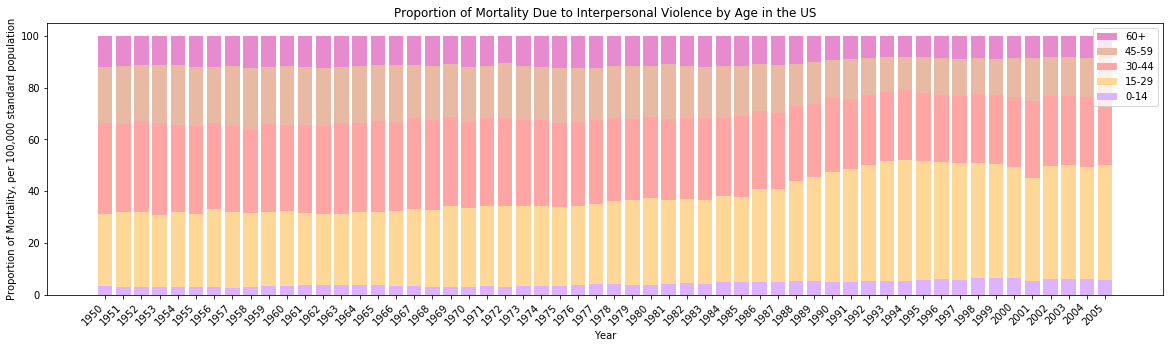

In [11]:
total = age_0_14 + age_15_29 + age_30_44 + age_45_59 + age_60
proportion_0_14 = np.true_divide(age_0_14, total) * 100
proportion_15_29 = np.true_divide(age_15_29, total) * 100
proportion_30_44 = np.true_divide(age_30_44, total) * 100
proportion_45_59 = np.true_divide(age_45_59, total) * 100
proportion_60 = np.true_divide(age_60, total) * 100

my_plotter(proportion_0_14, proportion_15_29, proportion_30_44, proportion_45_59, proportion_60, year, label1, colors2)
plt.ylabel("Proportion of Mortality, per 100,000 standard population")
plt.xlabel("Year")
plt.title("Proportion of Mortality Due to Interpersonal Violence by Age in the US")
plt.ylim=1.0
plt.show()


The distribution of mortality by gender has appeared to be steady for the past several decades, staying at 22% female and 78% male. 

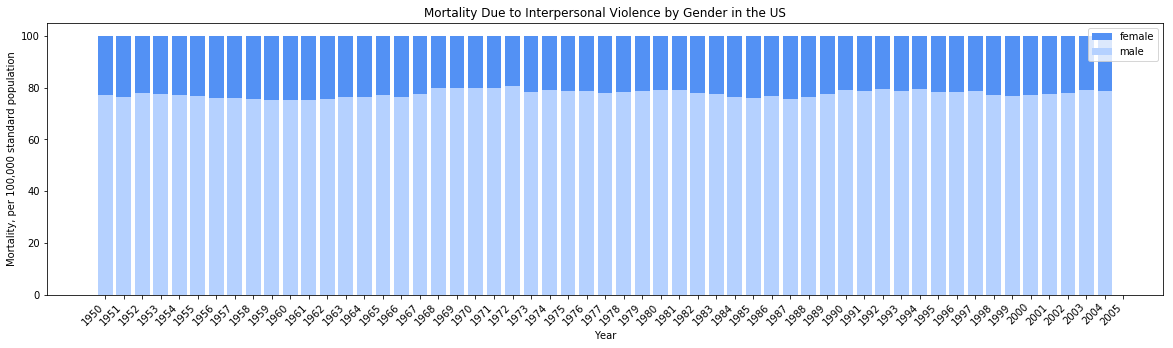

In [12]:
# proportion bar plot for gender distribution 
female = df_us['female']
male = df_us['male']
total = female + male
proportion_f = np.true_divide(female, total) * 100
proportion_m = np.true_divide(male, total) * 100

my_plotter_gender(proportion_f, proportion_m, year)
plt.ylabel("Mortality, per 100,000 standard population")
plt.xlabel("Year")
plt.title("Mortality Due to Interpersonal Violence by Gender in the US")
plt.show()


In [13]:
# calculate female mortality proportion 
df_us['proportion'] = df_us['female'] / (df_us['female'] + df_us['male'])
df_us.describe()

,0-14,15-29,30-44,45-59,60+,female,male,total,proportion
count,56.000000,56.000000,56.000000,56.000000,56.000000,55.000000,55.000000,56.000000,55.000000
mean,1.569097,12.905299,11.418625,6.949926,3.946784,3.392687,11.982351,36.789731,0.223158
std,0.554412,4.308865,2.949411,1.948842,1.150978,0.748649,3.224421,9.286117,0.014017
min,0.655069,6.751265,7.699138,4.264470,2.403506,2.233017,7.386043,23.675518,0.192505
25%,1.089804,7.828143,8.541978,5.519278,2.990776,2.609338,8.574509,27.832719,0.211831
50%,1.720456,13.210810,11.464290,6.529692,3.651086,3.462620,12.321580,38.172775,0.223802
75%,1.957960,15.619573,13.972115,8.343377,4.692783,4.054578,14.623210,45.260530,0.235341
max,2.579402,21.780300,17.324270,10.766270,6.268022,4.491541,16.930360,52.100944,0.247675


<a id='conclusions'></a>
## Conclusions

It's important to note that I've only looked at the 2004 data worldwide and it cannot be generalized. There are only a little bit over 50 countries in the data set, and we have a lot more countries and years that are missing or incomplete. 

For the United States, because the data is from 1950 to 2005, it may give us some insight to predict future trends. We can use linear regression, but there are also limitations. For example, there may not be sufficient data to determine the coefficients in the model, and the model may not adequately describe the processes that generated the data. 

Now that I have discovered some interesting facts about mortality due to interpersonal violence by age and gender for different countries and United States, it would be more interesting if we had complete data and find out why by analyzing life expectancy, education, per capita income, etc and to see if or how mortality is related to these aspects. 